# Homework 1 <br>

## Week -01

## MLOps Zoomcamp

Link to the [homework](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/01-intro/homework.md)

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [1]:
!ls

data  homework-week-01-intrduction.ipynb


In [2]:
#!mkdir data

In [3]:
%cd data/

/home/bsarma/git_workspace/MLOps-zoomcamp/homeworks/week-01-introduction/data


In [4]:
!pwd

/home/bsarma/git_workspace/MLOps-zoomcamp/homeworks/week-01-introduction/data


In [5]:
ls

yellow_tripdata_2022-01.parquet  yellow_tripdata_2022-02.parquet


In [6]:
#!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

In [7]:
#!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

In [8]:
!ls

yellow_tripdata_2022-01.parquet  yellow_tripdata_2022-02.parquet


In [9]:
import pandas as pd

In [10]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [11]:
#!pip install pyarrow

In [12]:
df.head().T

,0,1,2,3,4
VendorID,1,1,2,2,2
tpep_pickup_datetime,2022-01-01 00:35:40,2022-01-01 00:33:43,2022-01-01 00:53:21,2022-01-01 00:25:21,2022-01-01 00:36:48
tpep_dropoff_datetime,2022-01-01 00:53:29,2022-01-01 00:42:07,2022-01-01 01:02:19,2022-01-01 00:35:23,2022-01-01 01:14:20
passenger_count,2.0,1.0,1.0,1.0,1.0
trip_distance,3.8,2.1,0.97,1.09,4.3
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,142,236,166,114,68
DOLocationID,236,42,166,68,163
payment_type,1,1,1,2,1


In [13]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [14]:
df.shape

(2463931, 19)

**Q1 Answer**

`19`

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45

In [15]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

We see that there are no missing values in the columns pickup time and dropoff time

In [16]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [17]:
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime','duration']].head()

,tpep_dropoff_datetime,tpep_pickup_datetime,duration
0,2022-01-01 00:53:29,2022-01-01 00:35:40,0 days 00:17:49
1,2022-01-01 00:42:07,2022-01-01 00:33:43,0 days 00:08:24
2,2022-01-01 01:02:19,2022-01-01 00:53:21,0 days 00:08:58
3,2022-01-01 00:35:23,2022-01-01 00:25:21,0 days 00:10:02
4,2022-01-01 01:14:20,2022-01-01 00:36:48,0 days 00:37:32


In [18]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [19]:
df['duration'].head()

0    17.816667
1     8.400000
2     8.966667
3    10.033333
4    37.533333
Name: duration, dtype: float64

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['duration'].describe()

count   2463931.00
mean         14.21
std          46.45
min       -3442.40
25%           6.32
50%          10.18
75%          16.17
max        8513.18
Name: duration, dtype: float64

In [21]:
df['duration'].std()

46.44530513776802

**Q2 Answer**

`46.45`

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

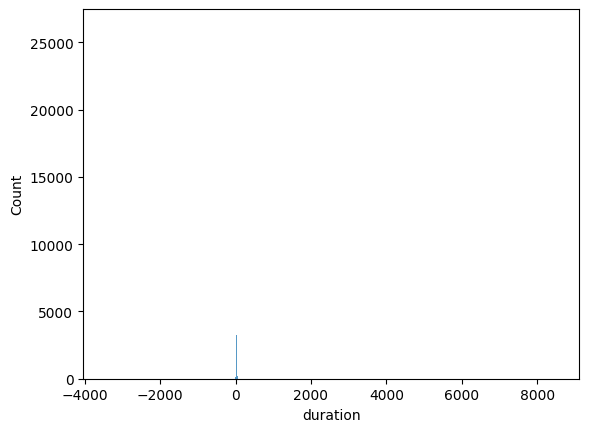

In [18]:
sns.histplot(df['duration'])
plt.show()

In [23]:
df_filtered = df[(df['duration']>=1) & (df['duration']<=60)]

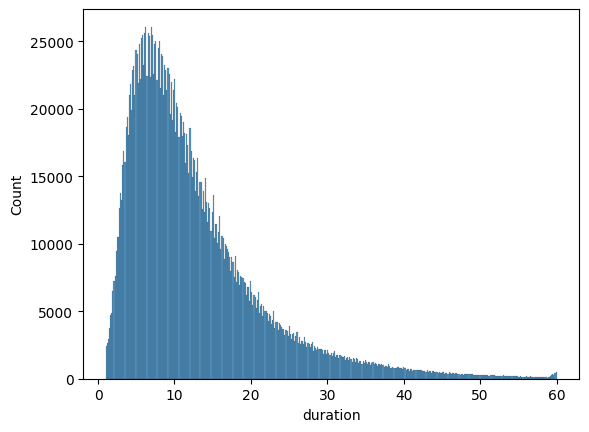

In [23]:
sns.histplot(df_filtered['duration'])
plt.show()

In [24]:
df_filtered.shape

(2421440, 20)

In [25]:
df.shape

(2463931, 20)

In [26]:
df_filtered.shape[0]/df.shape[0]*100

98.27547930522405

**Q3 Answer**

`98%`

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [24]:
df_filtered.head().T

,0,1,2,3,4
VendorID,1,1,2,2,2
tpep_pickup_datetime,2022-01-01 00:35:40,2022-01-01 00:33:43,2022-01-01 00:53:21,2022-01-01 00:25:21,2022-01-01 00:36:48
tpep_dropoff_datetime,2022-01-01 00:53:29,2022-01-01 00:42:07,2022-01-01 01:02:19,2022-01-01 00:35:23,2022-01-01 01:14:20
passenger_count,2.00,1.00,1.00,1.00,1.00
trip_distance,3.80,2.10,0.97,1.09,4.30
RatecodeID,1.00,1.00,1.00,1.00,1.00
store_and_fwd_flag,N,N,N,N,N
PULocationID,142,236,166,114,68
DOLocationID,236,42,166,68,163
payment_type,1,1,1,2,1


In [27]:
categorical = ['PULocationID', 'DOLocationID']
df_filtered[categorical].isnull().sum()

PULocationID    0
DOLocationID    0
dtype: int64

In [28]:
df_filtered[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [29]:
#df_filtered[categorical] = df_filtered[categorical].astype('str')
df_filtered.loc[:, categorical] = df_filtered[categorical].astype('str')

In [30]:
df_filtered[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [31]:
train_dicts = df_filtered[categorical].to_dict(orient='records')

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
dv = DictVectorizer(sparse=False)

In [ ]:
X_train = dv.fit_transform(train_dicts)

In [35]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [36]:
X_train.shape

(2421440, 515)

In [37]:
len(dv.feature_names_)

515

**Q4 Answer**

`515`

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 6.99
* 11.99
* 16.99
* 21.99

In [38]:
y_train = df_filtered.duration.values
type(y_train)

numpy.ndarray

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

In [43]:
mean_squared_error(y_train, y_pred, squared = False)

6.986190837370544

**Q5 Answer**

RMSE on train data is `6.99`

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79

In [44]:
!ls

yellow_tripdata_2022-01.parquet  yellow_tripdata_2022-02.parquet


In [45]:
df_val = pd.read_parquet('yellow_tripdata_2022-02.parquet')

In [50]:
df_val.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [52]:
df_val.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          101738
trip_distance                 0
RatecodeID               101738
store_and_fwd_flag       101738
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     101738
airport_fee              101738
dtype: int64

In [53]:
df_val.head().T

,0,1,2,3,4
VendorID,1,1,1,2,2
tpep_pickup_datetime,2022-02-01 00:06:58,2022-02-01 00:38:22,2022-02-01 00:03:20,2022-02-01 00:08:00,2022-02-01 00:06:48
tpep_dropoff_datetime,2022-02-01 00:19:24,2022-02-01 00:55:55,2022-02-01 00:26:59,2022-02-01 00:28:05,2022-02-01 00:33:07
passenger_count,1.00,1.00,1.00,1.00,1.00
trip_distance,5.40,6.40,12.50,9.88,12.16
RatecodeID,1.00,1.00,1.00,1.00,1.00
store_and_fwd_flag,N,N,N,N,N
PULocationID,138,138,138,239,138
DOLocationID,252,41,200,200,125
payment_type,1,2,2,2,1


In [54]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime

In [55]:
df_val.head().T

,0,1,2,3,4
VendorID,1,1,1,2,2
tpep_pickup_datetime,2022-02-01 00:06:58,2022-02-01 00:38:22,2022-02-01 00:03:20,2022-02-01 00:08:00,2022-02-01 00:06:48
tpep_dropoff_datetime,2022-02-01 00:19:24,2022-02-01 00:55:55,2022-02-01 00:26:59,2022-02-01 00:28:05,2022-02-01 00:33:07
passenger_count,1.00,1.00,1.00,1.00,1.00
trip_distance,5.40,6.40,12.50,9.88,12.16
RatecodeID,1.00,1.00,1.00,1.00,1.00
store_and_fwd_flag,N,N,N,N,N
PULocationID,138,138,138,239,138
DOLocationID,252,41,200,200,125
payment_type,1,2,2,2,1


In [56]:
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

In [57]:
df_val.head().T

,0,1,2,3,4
VendorID,1,1,1,2,2
tpep_pickup_datetime,2022-02-01 00:06:58,2022-02-01 00:38:22,2022-02-01 00:03:20,2022-02-01 00:08:00,2022-02-01 00:06:48
tpep_dropoff_datetime,2022-02-01 00:19:24,2022-02-01 00:55:55,2022-02-01 00:26:59,2022-02-01 00:28:05,2022-02-01 00:33:07
passenger_count,1.00,1.00,1.00,1.00,1.00
trip_distance,5.40,6.40,12.50,9.88,12.16
RatecodeID,1.00,1.00,1.00,1.00,1.00
store_and_fwd_flag,N,N,N,N,N
PULocationID,138,138,138,239,138
DOLocationID,252,41,200,200,125
payment_type,1,2,2,2,1


In [58]:
df_val.shape

(2979431, 20)

In [59]:
df_val = df_val[(df_val['duration']>=1) & (df_val['duration']<=60)]

In [60]:
df_val.shape

(2918187, 20)

In [61]:
categorical

['PULocationID', 'DOLocationID']

In [62]:
df_val.loc[:, categorical] = df_val[categorical].astype('str')

In [65]:
df_filtered[categorical].isnull().sum()

PULocationID    0
DOLocationID    0
dtype: int64

In [66]:
df_filtered[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [67]:
val_dicts = df_val[categorical].to_dict(orient='records') 

In [73]:
X_val = dv.transform(val_dicts)

In [74]:
X_val.shape

(2918187, 514)

In [75]:
X_train.shape

(2421440, 515)

In [76]:
y_pred_val = lr.predict(X_val)

ValueError: X has 514 features, but LinearRegression is expecting 515 features as input.